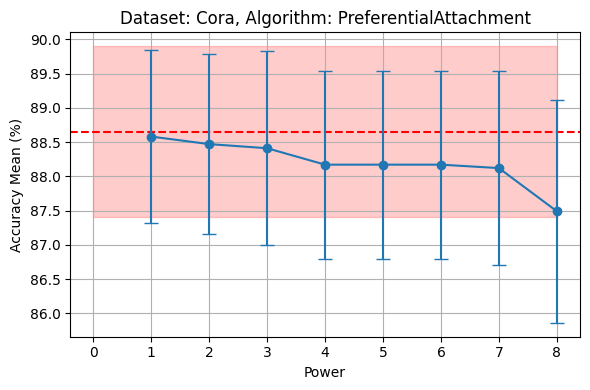

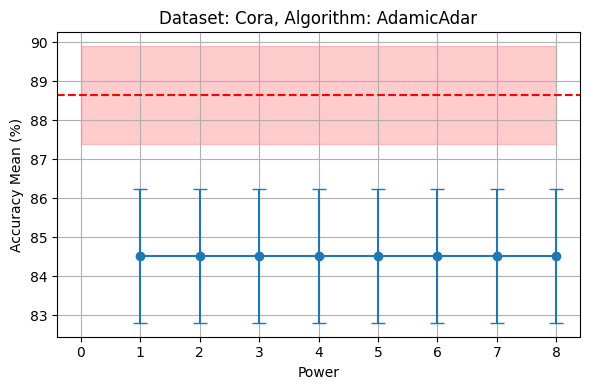

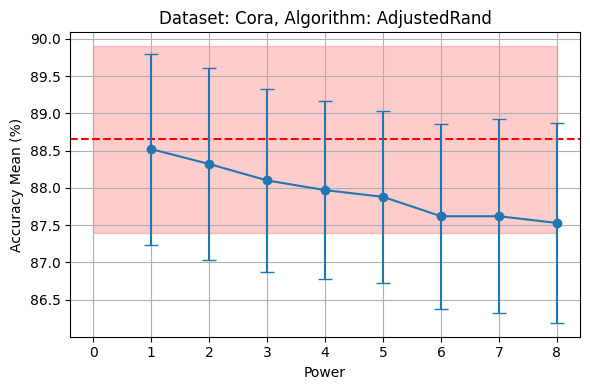

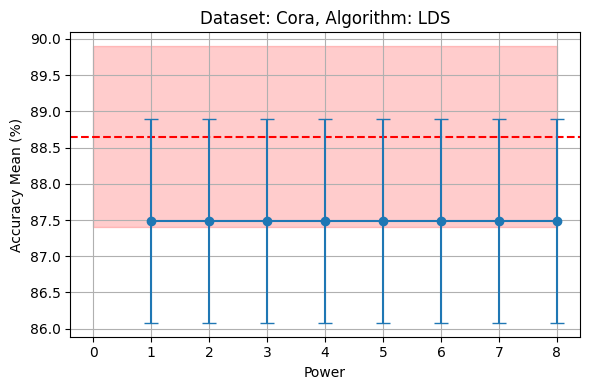

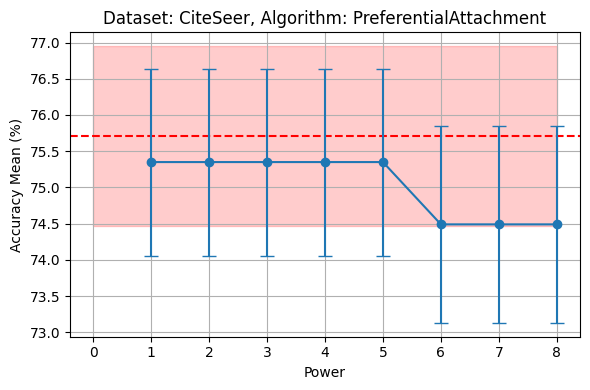

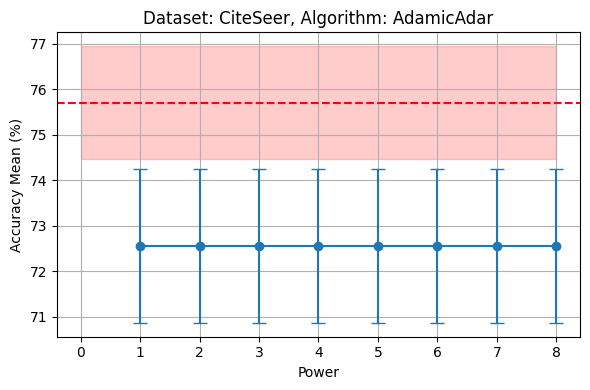

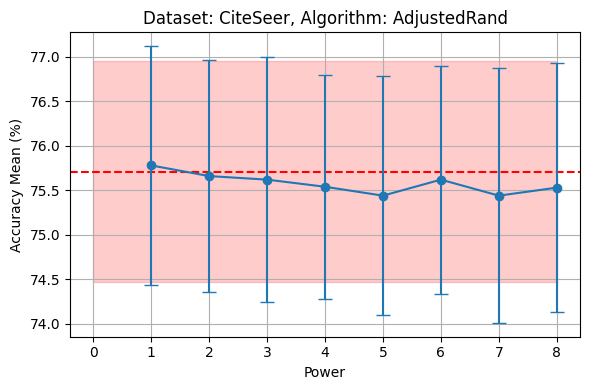

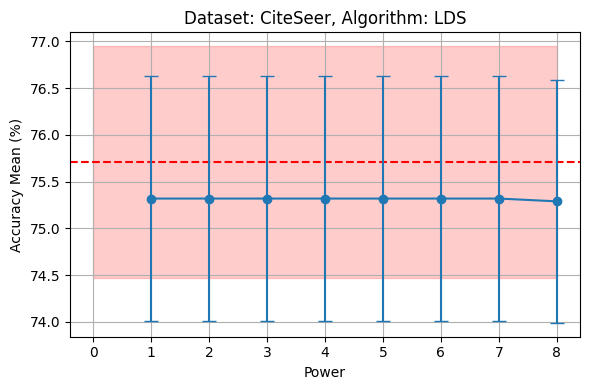

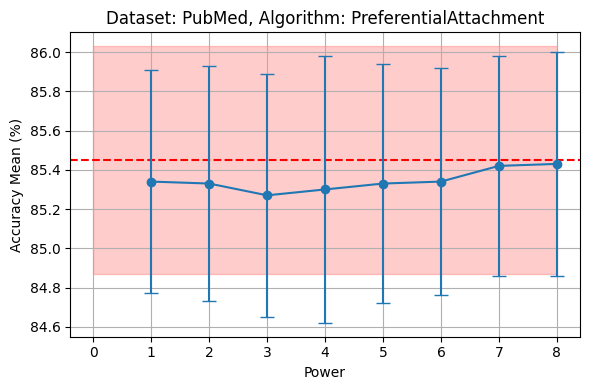

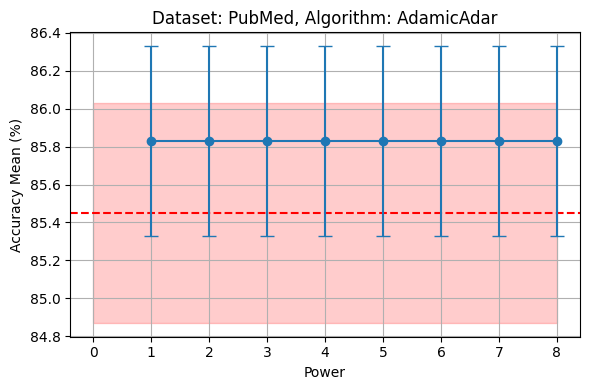

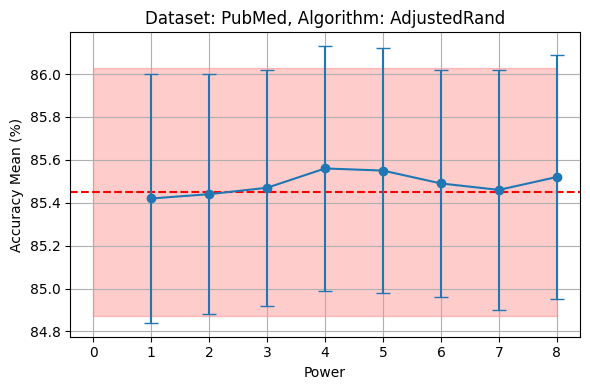

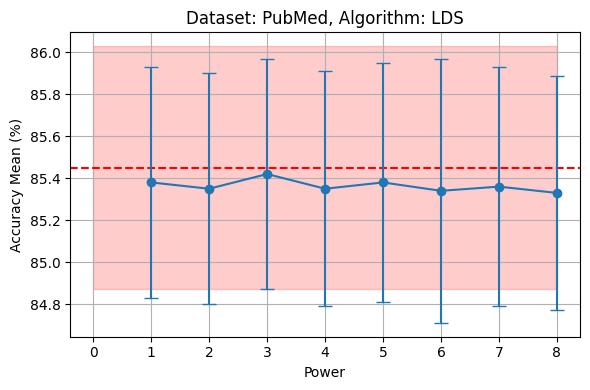

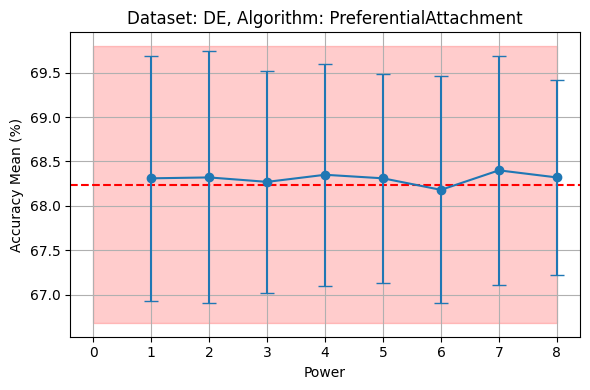

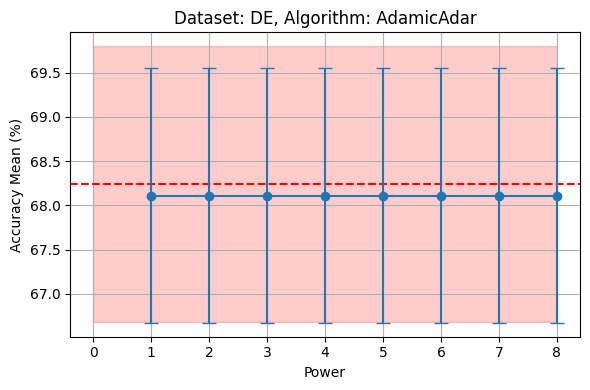

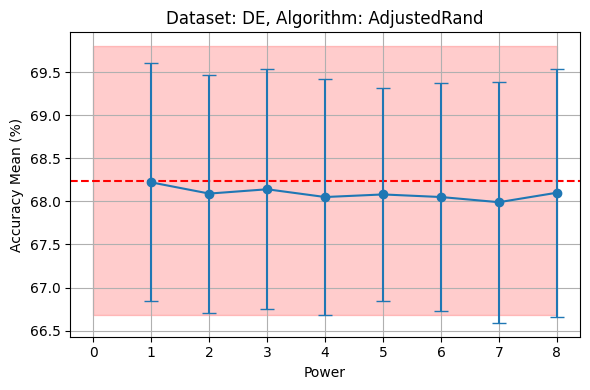

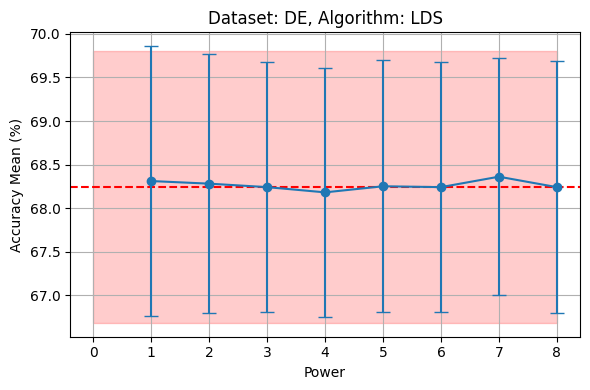

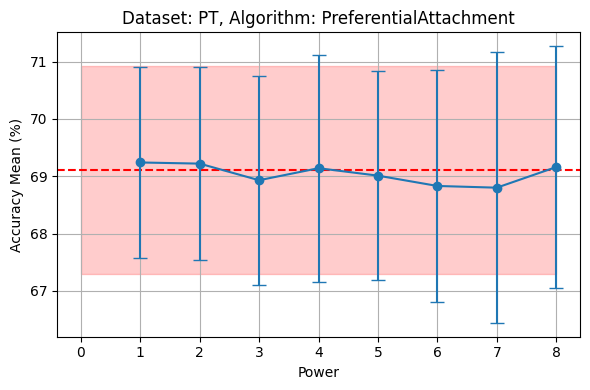

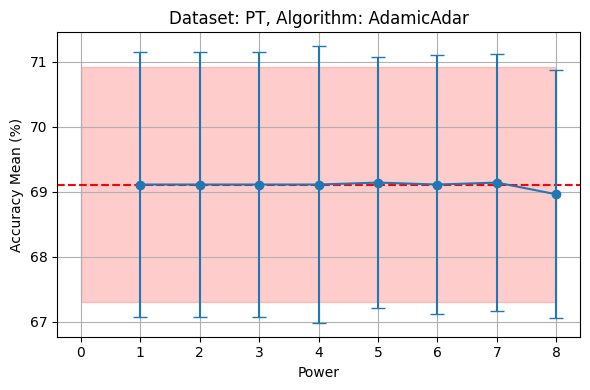

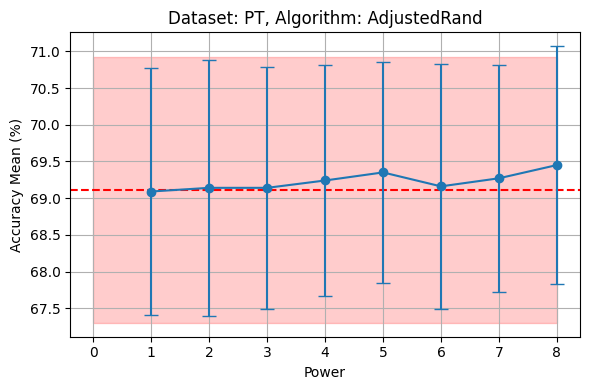

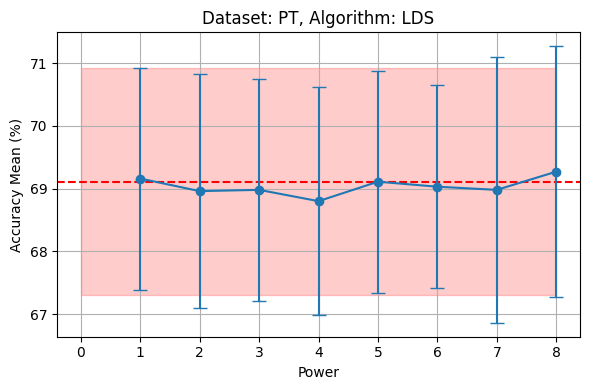

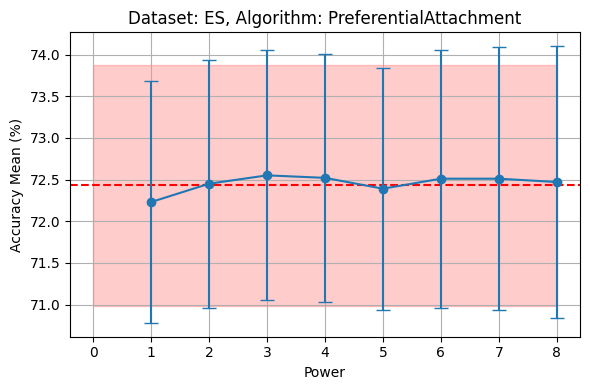

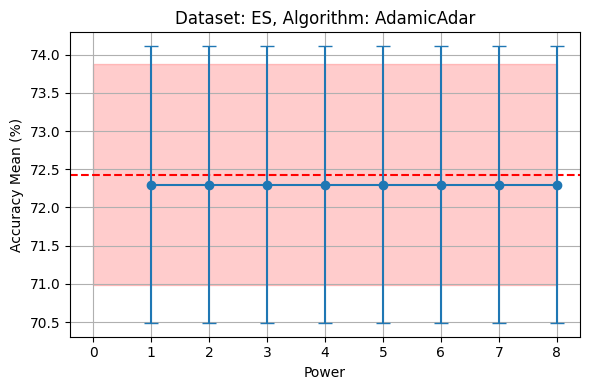

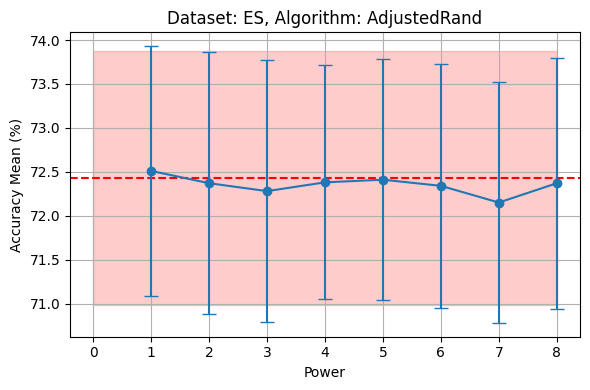

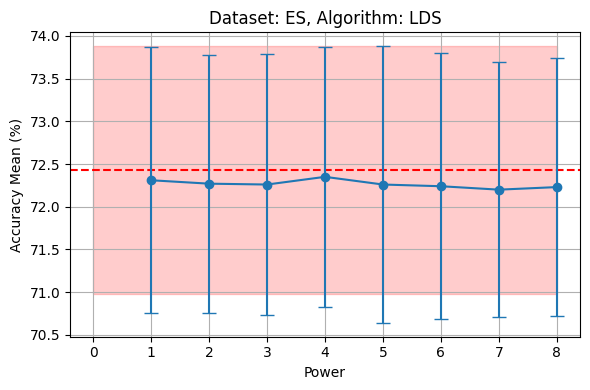

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = 'results.csv'
df = pd.read_csv(file_path)

# Convert necessary columns to numeric, coercing errors to NaN
df['Accuracy Mean'] = pd.to_numeric(df['Accuracy Mean'].str.replace('%', ''), errors='coerce')
df['Accuracy Std'] = pd.to_numeric(df['Accuracy Std'].str.replace('%', ''), errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')
df['Removed %'] = pd.to_numeric(df['Removed %'].str.replace('%', ''), errors='coerce')

# Get unique datasets and algorithms
datasets = df['Dataset'].unique()
algorithms = df['Sparsing Name'].unique()

# Loop through each dataset-algorithm combination
for dataset in datasets:
  for algorithm in algorithms:
    if algorithm != 'NoSparsification':
      subset = df[(df['Dataset'] == dataset) & (df['Sparsing Name'] == algorithm)]
      power = subset['Power'].fillna(0)
      accuracy_mean = subset['Accuracy Mean']
      accuracy_std = subset['Accuracy Std']
      
      # Get no-sparsification accuracy and standard deviation (assuming one row)
      no_sparsification_accuracy = df[(df['Dataset'] == dataset) & (df['Sparsing Name'] == 'NoSparsification')]['Accuracy Mean'].values[0]
      no_sparsification_std = df[(df['Dataset'] == dataset) & (df['Sparsing Name'] == 'NoSparsification')]['Accuracy Std'].values[0]

      # Create a new figure for each combination
      plt.figure(figsize=(6, 4))  # Adjust figure size as needed
      
      # Plot no-sparsification accuracy as a horizontal line
      plt.axhline(no_sparsification_accuracy, color='red', label='NoSparsification', linestyle='--')
    #   plt.axhline(no_sparsification_accuracy + no_sparsification_std, color='pink')
    #   plt.axhline(no_sparsification_accuracy-no_sparsification_std, color='pink')
      
      # Plot error bars for the chosen algorithm
      plt.errorbar(power, accuracy_mean, yerr=accuracy_std, marker='o', capsize=5, label=algorithm)
      
      # Create transparent rectangle for no-sparsification standard deviation
      plt.fill_between(range(0,9), no_sparsification_accuracy + no_sparsification_std, no_sparsification_accuracy - no_sparsification_std, 
                      color='red', alpha=0.2, label='NoSparsification Std Dev')

      plt.title(f'Dataset: {dataset}, Algorithm: {algorithm}')
      plt.xlabel('Power')
      plt.ylabel('Accuracy Mean (%)')
      plt.grid(True)
      plt.tight_layout()
      plt.show()
